# LOWESS Quick-Start

<br>

### Imports

In [35]:
import numpy as np

import matplotlib.pyplot as plt

from moepy import lowess, eda

<br>

### Standard

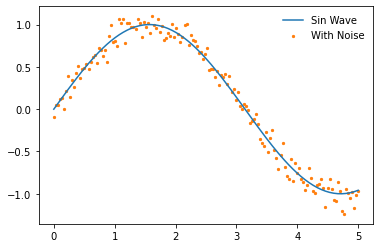

In [17]:
x = np.linspace(0, 5, num=150)
y = np.sin(x)

y_noisy = y + (np.random.normal(size=len(y)))/10

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

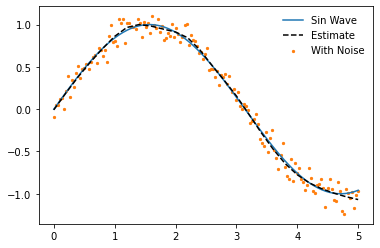

In [23]:
lowess_model = lowess.Lowess()
lowess_model.fit(x, y_noisy, frac=0.2)

x_pred = np.linspace(0, 5, 26)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='Estimate', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

### Robust

By default robust regression is turned on so normally you should not have to think about it but in this example we'll look at what it actually does. We'll start by creating some test data relevant to this example, in particular one that contains some outliers.

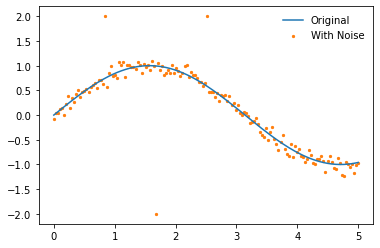

In [24]:
y_noisy[25] = 2
y_noisy[50] = -2
y_noisy[75] = 2

plt.plot(x, y, label='Original', zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

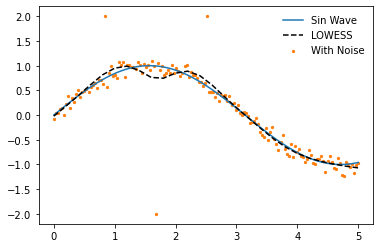

In [29]:
lowess_model.fit(x, y_noisy, frac=0.2, robust_iters=0)
y_pred = lowess_model.predict(x_pred)

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

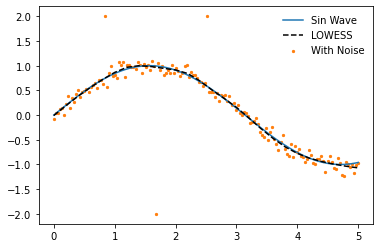

In [30]:
lowess_model.fit(x, y_noisy, frac=0.2, robust_iters=3)
y_pred = lowess_model.predict(x_pred)

plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

<br>

### Quantile

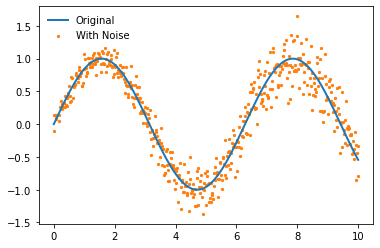

In [38]:
x = np.linspace(0, 10, num=500)
y = np.sin(x)

heteroskedasticity_factor = (1 + 2*np.array(range(len(x)))/len(x))/10
y_noisy = y + heteroskedasticity_factor*(np.random.normal(size=len(y)))

# Plotting
plt.plot(x, y, label='Original', linewidth=2, zorder=2)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

Wall time: 3.36 s


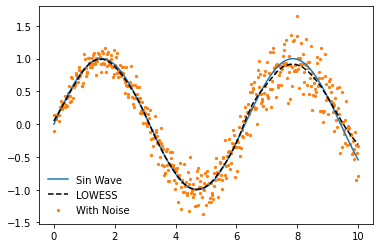

In [44]:
%%time

quantile_model = lowess.Lowess(reg_func=lowess.calc_quant_reg_betas)
quantile_model.fit(x, y_noisy, frac=0.15, q=0.5, robust_iters=0)

x_pred = np.linspace(0, 10, 50)
y_pred = quantile_model.predict(x_pred)

# Plotting
plt.plot(x, y, label='Sin Wave', zorder=2)
plt.plot(x_pred, y_pred, '--', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y_noisy, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)

In [45]:
df_quantiles = lowess.quantile_model(x, y_noisy, frac=0.2, num_fits=100, robust_iters=1)

df_quantiles.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.27it/s]


quantiles,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
x,,,,,,,,,
0.00000,0.024140,0.031809,0.056733,0.060823,0.076858,0.089032,0.110145,0.122453,0.147532
0.02004,0.036181,0.044827,0.070037,0.074680,0.091828,0.104180,0.125232,0.138615,0.165351
0.04008,0.048211,0.057842,0.083342,0.088536,0.106764,0.119335,0.140330,0.154777,0.183179
0.06012,0.060234,0.070862,0.096657,0.102405,0.121681,0.134514,0.155460,0.170966,0.201033
0.08016,0.072253,0.083891,0.109989,0.116294,0.136588,0.149727,0.170633,0.187195,0.218923


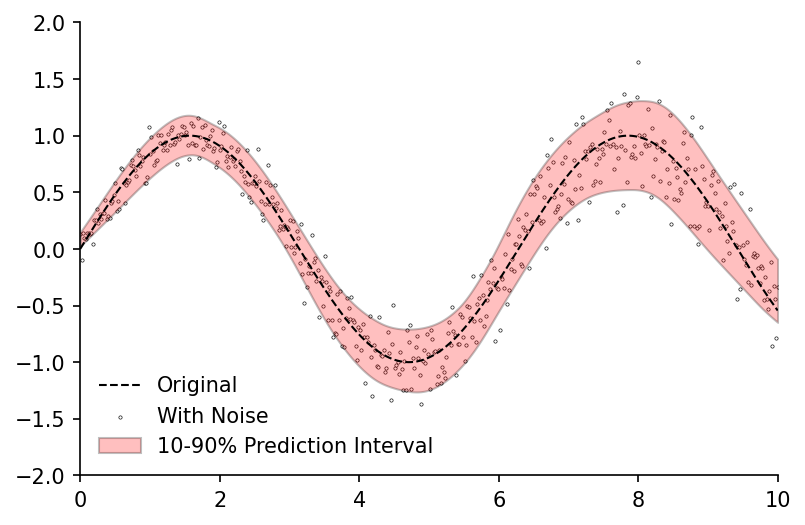

In [47]:
fig, ax = plt.subplots(dpi=150)

ax.plot(x, y, 'k--', label='Original', linewidth=1, zorder=2)
ax.scatter(x, y_noisy, label='With Noise', color='w', edgecolor='k', linewidth=0.3, s=2.5, zorder=1)
ax.fill_between(df_quantiles.index, df_quantiles[0.1], df_quantiles[0.9], color='r', edgecolor='k', alpha=0.25, label='10-90% Prediction Interval')

ax.legend(frameon=False, loc=3)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
eda.hide_spines(ax)

<br>

### Confidence

In [32]:
df_bootstrap = lowess.bootstrap_model(
    x, 
    y_noisy, 
    num_runs=1000, 
    model=lowess.Lowess(), 
    frac=0.2, 
    num_fits=20
)

df_bootstrap.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.79it/s]


bootstrap_run,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
x,,,,,,,,,,,,,,,,,,,,,
0.00000,0.201351,0.144480,0.145314,0.174008,0.067483,0.171813,0.147632,0.118480,0.049836,0.120671,...,0.071988,0.091529,0.127914,0.109467,0.055393,0.048548,0.048767,0.169435,0.121099,0.158459
0.02004,0.213548,0.157691,0.157366,0.185430,0.080968,0.183531,0.160215,0.132095,0.066425,0.134342,...,0.086620,0.105465,0.142032,0.123263,0.072007,0.064238,0.063858,0.182103,0.134463,0.170474
0.04008,0.225732,0.170884,0.169408,0.196842,0.094440,0.195237,0.172781,0.145702,0.082996,0.148010,...,0.101241,0.119388,0.156134,0.137053,0.088623,0.079926,0.078920,0.194753,0.147801,0.182480
0.06012,0.237906,0.184061,0.181440,0.208243,0.107898,0.206931,0.185333,0.159304,0.099550,0.161677,...,0.115853,0.133302,0.170220,0.150836,0.105240,0.095614,0.093956,0.207387,0.161114,0.194477
0.08016,0.250079,0.197222,0.193478,0.219634,0.121381,0.218625,0.197905,0.172924,0.116126,0.175341,...,0.130500,0.147286,0.184293,0.164614,0.121883,0.111301,0.108966,0.220006,0.174406,0.206481


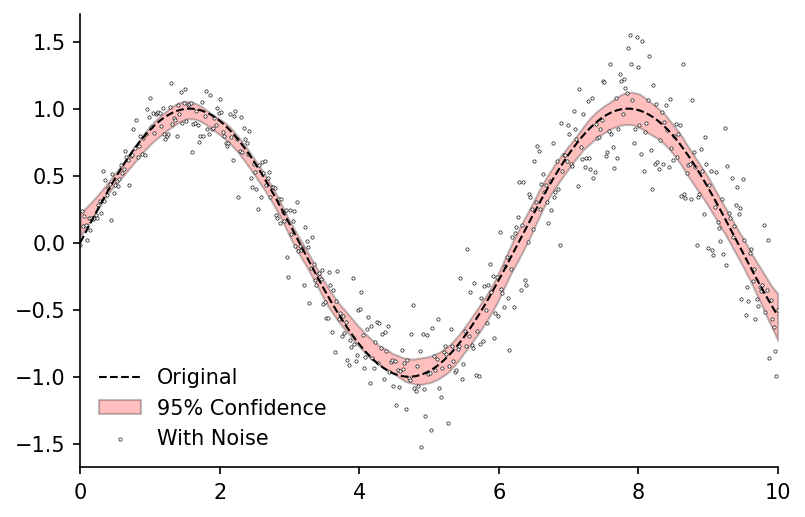

In [36]:
df_conf_intvl = lowess.get_confidence_interval(df_bootstrap, conf_pct=0.95)

# Plotting
fig, ax = plt.subplots(dpi=150)

ax.plot(x, y, 'k--', label='Original', linewidth=1, zorder=2)
ax.fill_between(df_conf_intvl.index, df_conf_intvl['min'], df_conf_intvl['max'], color='r', edgecolor='k', alpha=0.25, label='95% Confidence')
ax.scatter(x, y_noisy, label='With Noise', color='w', edgecolor='k', linewidth=0.3, s=2.5, zorder=1)

ax.legend(frameon=False)
ax.set_xlim(0, 10)
eda.hide_spines(ax)